# 01 Linear Regression
## By: Paul Tuccinardi

Goal: Using the housing.csv file, use linear regression to determine house value based on income

### What is Linear Regression?

Linear Regression is a statistical method that is used to model the relationship between a dependent variable and one or more independent variables. It creates a line of best fit which is then used in predicting the outcome values.

## Import data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Load the dataset object
df = pd.read_csv('housing.csv')

# 2. Display the first few rows to verify the load
print("--- Python DataFrame Head ---")
print(df.head())



--- Python DataFrame Head ---
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


Define the x and y variables
- x: median income
- y: median house value

In [3]:
y = df['median_house_value']
x = df['median_income']

## Find correlation between variables

In [4]:
corr = x.corr(y)
print(f"Correlation between Median Income and MEDV: {corr:.4f}")

Correlation between Median Income and MEDV: 0.6881


The results of this show a slight positive correlation between the 2 variables

## Visualize the data

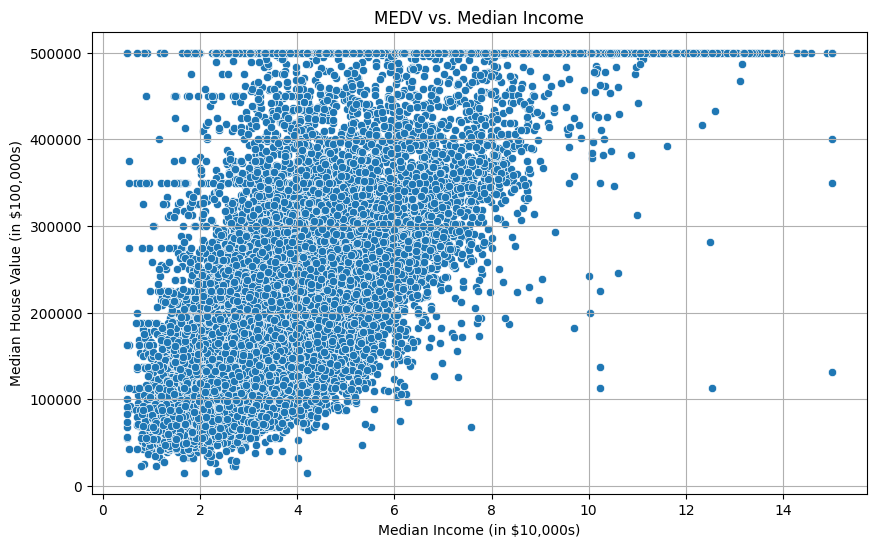

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x, y=y)
plt.title('MEDV vs. Median Income')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value (in $100,000s)')
plt.grid(True)
plt.show()

From this graph above it can be noted that there is a positive correlation between the Median Income and the Median House Value. As the median income increases so does the median house value.

## Create a linear regression model and print the results

### Creating a linear regression model by hand

In [6]:
def linear_regression(x,y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)

    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

In [7]:
slope, intercept = linear_regression(x,y)
pred = slope * x + intercept

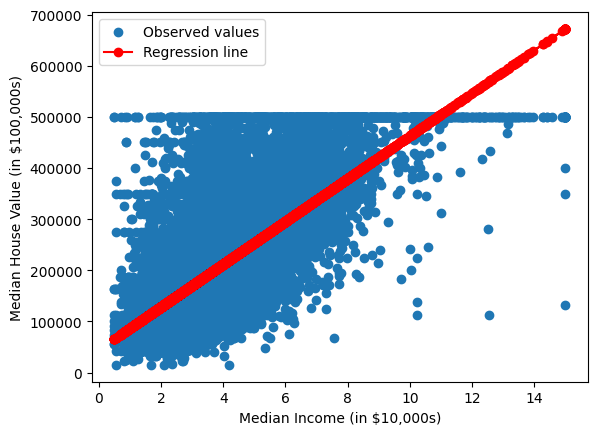

In [11]:
plt.scatter(x, y, label='Observed values')
plt.plot(x, pred, color='red', marker='o', label='Regression line')
plt.xlabel('Median Income (in $10,000s)')
plt.ylabel('Median House Value (in $100,000s)')
plt.legend()
plt.show()

In [9]:
import statsmodels.api as sm
# 1. Add a constant (intercept, or Beta_0) to the predictor variable
x_with_const = sm.add_constant(x)

# 2. Instantiate and fit the Ordinary Least Squares (OLS) model
# OLS is the method used for standard Linear Regression
model = sm.OLS(y, x_with_const)
results = model.fit()

# 3. Print the comprehensive statistical summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        22:40:37   Log-Likelihood:            -2.6325e+05
No. Observations:               20640   AIC:                         5.265e+05
Df Residuals:                   20638   BIC:                         5.265e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.509e+04   1322.872     34.082

### Results
The R-squared and Adj. R-squared indicate that 47.3% of the house values can be explained by the income. Another metric in here to consider is the coefficient(coeff) which indicates that as the median income increases there is a 4.509e+04 increase in the house values. Utilizing Linear Regression can provide valuable information which can lead to making various decisions.